In [373]:
clear all;

## Fonction de creation du noyau

## Definition des variables

### Definition des variables d'entre

In [374]:
clear all;
% points de données d'entrée
X = 0:0.01:0.99;
X = X';

### Definition de modele : 

On commence par un modele alearatoire

In [375]:
% definition de modele
y = cos(2*pi*X);

### Repartition des variables en entrainement et test

In [376]:

X_test = X(1:2:end);
y_test = y(1:2:end);
X_train = X(2:2:end);
y_train = y(2:2:end);
n = length(X); % nombre de points de données
n2 = length(X_train);
% size(y_train)

In [377]:
size(X)


ans =

   100     1



### Definition des parametres 

In [378]:
 % parametres initiaux
omega = ones(n2, 1);
size(omega)


ans =

    50     1



## Definition de noyau 

### Implementation de fonction de noyau

fichier noyau.m : 

In [379]:
%%file noyau.m

function noyau = noyau(x, x1, choix)
  switch choix
      case 1
          % Noyau linéaire
          c = 0.1; 
          y = x' * x1 + c;
      case 2
          % Noyau polynomial
          alpha = 0.05*10^-5; % Valeur arbitraire pour alpha, vous pouvez ajuster selon vos besoins
          c = 1; % Valeur arbitraire pour c, vous pouvez ajuster selon vos besoins
          d = 2; % Valeur arbitraire pour d, vous pouvez ajuster selon vos besoins
          y = (alpha .* (x' .* x1) + c) .^ d;
      case 3
          % Noyau gaussien
          sigma = 0.1; 
          y = exp(-norm(x - x1) .^ 2 ./ (2 * sigma^2));
      case 4
          % Noyau exponentiel
          sigma = 5; 
          y = exp(-norm(x - x1) ./ (2 * sigma ^ 2));
      case 5
          % Noyau laplacien
          sigma = 1; 
          y = exp(-norm(x - x1) / sigma);
      case 6
          % Noyau sinc
          sigma = 1; 
          y = prod(sin(sigma * (x - x1)) ./ (sigma * (x - x1)));
      otherwise
          error('Type de noyau non reconnu.');
  end
  noyau = y;
end

Created file '/home/akram/Documents/master/ML/TP2/noyau.m'.


### Definition de noyau linéaire

In [380]:
% choix de noyau linéaire
choix = 1;
K = zeros(n2, n2);
for i = 1:n2 
  K(i, :) = noyau(X_train, X_train(i, :), choix);
end  
size(K)


ans =

    50    50



## Definition du fonction

La fonction est définie comme suivant : 

$f(\omega, x) = \sum_{i=1}^{n} \omega_i K(x, x_i)$


In [381]:
f = @(omega, x) arrayfun(@(i) sum(noyau(x, X_train(i, :), choix) * omega), 1:n2)
% f = @(omega) sum(omega' * K)


f =

  function_handle with value:

    @(omega,x)arrayfun(@(i)sum(noyau(x,X_train(i,:),choix)*omega),1:n2)



## Definition de function de risque empirique

La fonction de risque empirique est définit comme suivante :

$ J (\omega, x, y) =  \frac{1}{n} \sum_{i = 0}^{n} \|f(w_i, x_i) - y_i\|^2  $ 


In [382]:
J = @(omega, x, y) 1/n * norm(f(omega, x) - y);

## Definition de gradient J

In [383]:
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);

## Gradient descent

In [384]:
alpha = 0.0001;
num_iterations = 50000;
hist_omega = zeros(n2, num_iterations);
for i = 1:num_iterations
  omega =  omega - (alpha * gradJ(omega));
  hist_omega(:, i) = omega;
  err(i) = J(omega, X_train, y_train);
end
size(omega)


ans =

    50     1



In [385]:
err(i)


ans =

    0.3643



In [386]:
min_err = find(err == min(err));
opt_omega = hist_omega(:, min_err);
J(opt_omega, X_train, y_train)


ans =

    0.3643



In [387]:
norm(gradJ(omega))


ans =

    0.0274



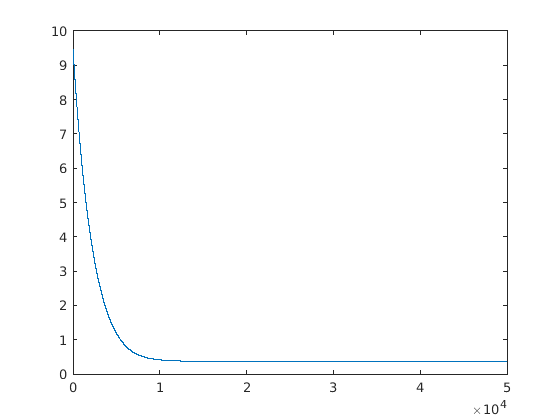

In [388]:
plot(1:num_iterations, err)

## Extraction des omega optimaux

In [389]:
% opt = find(err == min(err));
% opt_omega = omega;
% opt

## Affichage de resultats

On affiche les y_train avec les y que notre model a predit

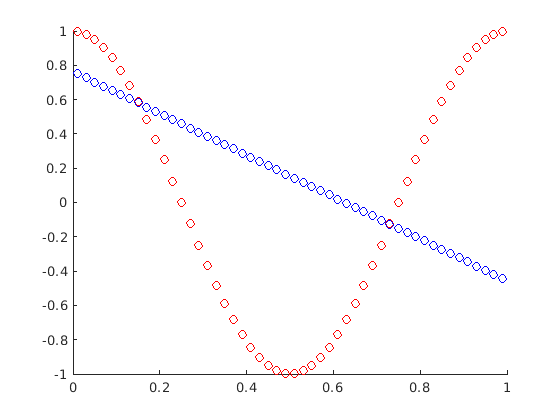

In [390]:
y_train_predit = f(opt_omega, X_train);
scatter(X_train, y_train, 'r')
hold on
scatter(X_train, y_train_predit, 'b')
hold off

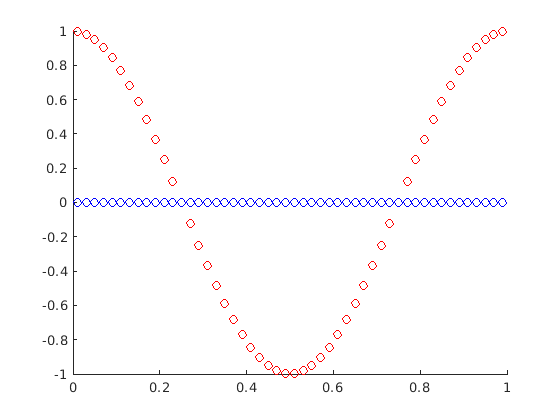

In [391]:
w_et = (K' * K) \ K' * y_train;
y_opt = f(w_et, X_train);
scatter(X_train, y_train, 'r')
hold on
scatter(X_train, y_opt, 'b')
hold off

## Sur les donnees de test

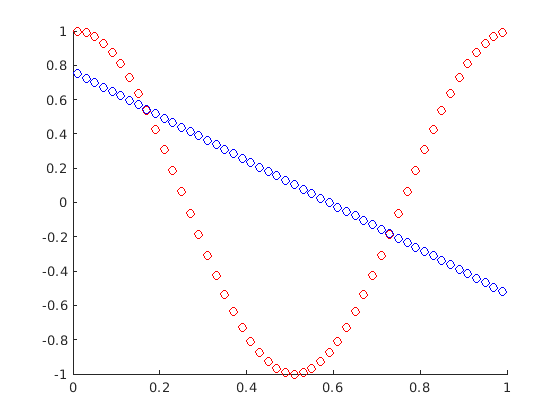

In [392]:
% y de test
y_test_predit = f(opt_omega, X_test);
scatter(X_train, y_test, 'r')
hold on
scatter(X_train, y_test_predit, 'b')
hold off

In [393]:
% y_train_predit = f(opt_omega, X_train );

norm(y_train_predit - y_train)


ans =

   36.4317



In [394]:
norm(y_test_predit - y_test)


ans =

   35.9984



In [395]:
w_et = (K' * K) \ (K' * y_train);
norm(opt_omega - w_et)
w_et;
opt_omega;



ans =

    3.6836



## Utilisation des autres modèles

$
(1) \quad f^*(x) = |x|, \quad x \in [-1, 1] \\
(2) \quad f^*(x) = 3\|x\|^3 - 2\|x\|^2 + 3\|x\|^2 + 3, \quad x \in [-1, 1]^3 \\
(3) \quad f^*(x) = \sin(x_1 + x_2), \quad x \in [-2, 2]^2 \\
(4) \quad f^*(x) = \frac{1}{3}(x_1 + x_2)^3 - \frac{1}{4}(x_1 + x_2)
$

In [441]:
clear all;
X = -1:0.01:0.99;
X = X';
X_train = X(1:2:end);
X_test = X(2:2:end);
% size(X_train)
y_train = modele(1, X_train);
% size(y_train)
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
  for i = 1:n2 
    K(i, :) = noyau(X_train, X_train(i, :), 2);
  end
% size(K)  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);

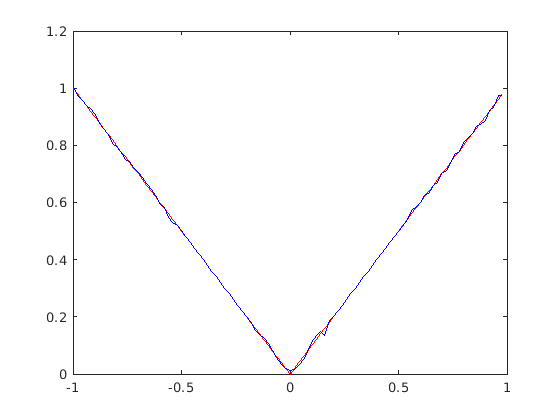

In [452]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et);
plot(X_train, y_train, 'r')
hold on
plot(X_train, y_et, 'b')
hold off

In [443]:
alpha = 0.2;
num_iterations = 10000;
err = zeros(1, num_iterations);
for i = 1:num_iterations
  omega =  omega - (alpha * gradJ(omega));
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
end

In [444]:
norm(gradJ(omega))


ans =

   6.1216e-04



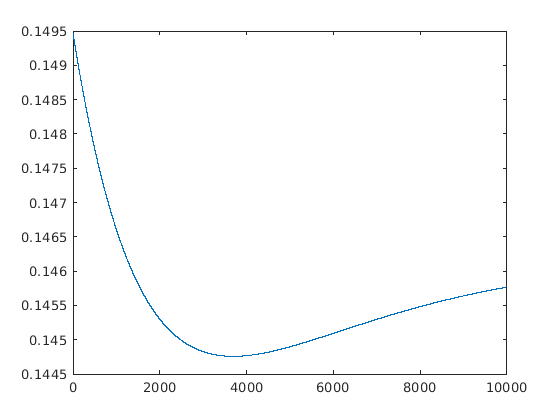

In [445]:
plot(1:num_iterations, err)


ans =

    0.1448



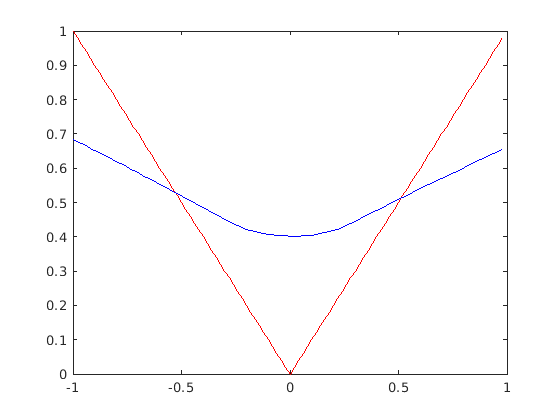

In [446]:
min_err = 0;
opt_omega = zeros(n2, 1);
min_err = find(err == min(err));
opt_omega = hist_omega(:, min_err);
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'r')
hold on
plot(X_train, y_predit, 'b')
hold off


In [261]:
f(opt_omega)


ans =

   23.8522



In [89]:

% % y2 = modele(1, X);
% num_iterations = 10000;
% for choix2 = 1:4
%   y2 = zeros(n, 1);
%   y2 = arrayfun(@(i) modele(choix2, X(i)), 1:n)';
%   y_train2 = y2(2:2:end);

%   % on initialise les paramètres de nouveau
%   omega2 = omega;
%   % choix de noyau linéaire
%   choix = 1;
%   K = zeros(n2, n2);
%   for i = 1:n2 
%     K(i, :) = noyau(X_train, X_train(i, :), choix2);
%   end
%   % On utilise le même noyau linéaire et on calcule le gradient pour chaque modèle
%   f = @(omega, x) arrayfun(@(i) sum(noyau(x, X_train(i, :), choix2) * omega), 1:n2);
%   J2 = @(omega, x, y) 1/n * norm(f(omega, x) - y);
%   gradJ2 = @(omega) (1/n) * K' * ((K * omega) - y_train2);


%   for i = 1:num_iterations
%     omega2 =  omega2 - (alpha * gradJ2(omega2));
%     hist_omega2(:, i) = omega2;
%     err2(i) = J2(omega2, X_train, y_train2);  
%   end

%   % On trouve le valeur de omega optimale : 
%   opt2 = find(err2 == min(err2));
%   opt_omega2 = hist_omega(:, opt2);

%   % On calcule les y predits pour chaque modèle
%   y_train_predit2 = f(opt_omega2, X_train);

%   figure;
%   plot(X_train, y_train2, 'r')
%   hold on
%   plot(X_train, y_train_predit2, 'b')
%   hold off
% end

In [453]:
norm(y_predit - y_et)


ans =

    2.1310



In [91]:

% y2 = zeros(n, 1);


% y2 = arrayfun(@(i) modele(2, X(i)), 1:n)';
% y_train2 = y2(2:2:end);
% % On utilise le mème noyau linéaire et on calcule le gradient pour chaque modèle
% J2 = @(omega, x, y) 1/n * norm(f(omega, x) - y2);
% gradJ2 = @(omega) (1/n) * K' * ((K * omega) - y_train2);
% for i = 1:num_iterations
%   omega =  omega - (alpha * gradJ2(omega));
%   hist_omega2(:, i) = omega;
%   err2(i) = J2(omega, X_train, y_train2);  
% end
% % On trouve le valeur de omega optimale : 
% opt2 = find(err2 == min(err2));
% opt_omega2 = hist_omega(:, opt2);
% % On calcule les y predits pour chaque modèle
% y_train_predit2 = f(opt_omega2, X_train);
% figure;
% plot(X_train, y_train2, 'r')
% hold on
% plot(X_train, y_train_predit2, 'b')
% hold off


In [92]:
% y2 = arrayfun(@(i) modele(2, X(i)), 1:n)';
% size(y2)